# Computational Physics Blatt 01
Anne und Fabian

## A1
### 1)
Numerische Stabilität beschreibt, wie stark sich Fehler durch einen Algorythmus bei endlicher Genauigkeit verstärken. Da in der Float Darstellung praktisch jede Rechenoperation mit Rundungsfehlern verbunden ist, sollte bei jedem Schritt darauf geachtet werden möglichst nicht:

- gleichgroße Zahlen von einander Abzuziehen, wegen Auslöschung
- Zahlen mit sehr unterschiedlichen Größenordnungen zu addieren, da $a +b = a$ für $b\ll a$ gilt
- durch kleine Zahlen zu teilen bzw. mit großen Zahlen zu multiplizieren

### 2)
Eine feiner Diskretisierung (= längere Mantisse) führt zu mehr "Platz" an denen Fehler auftreten können. Zum Beispiel könnten zwei Zwischenergebnisse von eineander Abgezogen werden.
Während $123,45−123,45=0$ das gewünschte Ergebniss liefert, könnte eine zusätzliche Nachkommastelle mit $123,456−123,457=−0,001$ eine Instabilität einführen.

## A2

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,12)
%matplotlib inline

In [21]:
def a_stupid(x):
    return 1 / np.sqrt(x) - 1 / np.sqrt(x + 1)


def b_stupid(x):
    return (1 - np.cos(x)) / np.sin(x)


def c_stupid(delta, x=42):
    return np.sin(x + delta) - np.sin(x)

\begin{align}
\frac{1}{\sqrt{x}}-\frac{1}{\sqrt{x+1}} &= \frac{\sqrt{x+1}-\sqrt{x}}{\sqrt{x}\sqrt{x+1}}\\
&= \frac{\sqrt{x+1}-\sqrt{x}}{\sqrt{x}\sqrt{x+1}}\frac{\sqrt{x+1}+ \sqrt{x}}{\sqrt{x+1}+ \sqrt{x}}\\
&= \frac{1}{\sqrt{x}(x+1)+\sqrt{x+1}x}
\\
\frac{1-\cos(x)}{\sin(x)} &= \tan\left(\frac{x}{2}\right)
\\
\sin(x+\delta) - \sin(x) &= 2\sin\left(\frac{\delta}{2}\right)\cos\left(x+\frac{\delta}{2}\right)
\end{align}

In [22]:
def a_smart(x):
    return 1 / ((x + 1) * np.sqrt(x) + x * np.sqrt(x + 1))


def b_smart(x):
    return np.tan(x / 2)


def c_smart(delta, x=42):
    return 2 * np.sin(delta / 2) * np.cos(x + delta / 2)

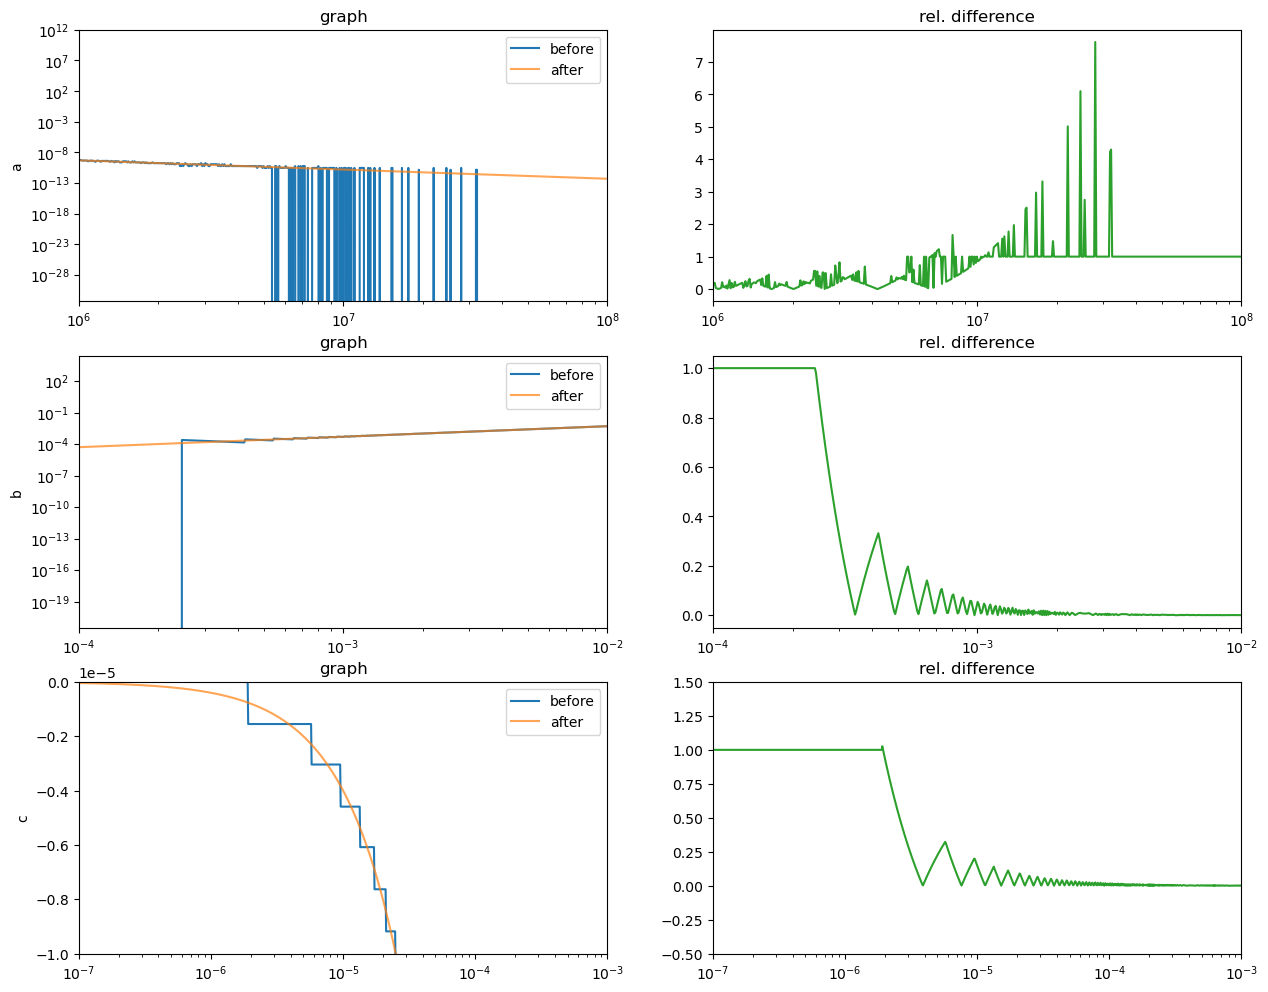

In [31]:
x = np.logspace(-20, 20, num=10000, dtype=np.float32)


def make_Plot(
    x,
    f1,
    f2,
    axs,
    title,
    xlim=None,
    ylim=None,
    ylimErr=None,
    yscale=None,
):
    axs[0, 0].plot(x, f1(x), label="before")
    axs[0, 0].plot(x, f2(x), label="after", alpha=0.7)
    if yscale:
        axs[0, 0].set_yscale(yscale)
    axs[0, 0].set_xscale("log")
    if xlim:
        axs[0, 0].set_xlim(xlim)
    if ylim:
        axs[0, 0].set_ylim(ylim)
    axs[0, 0].legend()
    axs[0, 0].set_ylabel(title)
    axs[0, 0].set_title("graph")
    axs[0, 1].plot(x, np.abs((f2(x) - f1(x)) / f2(x)), c="tab:green")
    axs[0, 1].set_title("rel. difference")
    axs[0, 1].set_xscale("log")
    if xlim:
        axs[0, 1].set_xlim(xlim)
    if ylimErr:
        axs[0, 1].set_ylim(ylimErr)


fig, axs = plt.subplots(3, 2)
make_Plot(x, a_stupid, a_smart, axs, "a", xlim=(1e6, 1e8), yscale="log")
make_Plot(x, b_stupid, b_smart, axs[1:, :], "b", xlim=(1e-4, 1e-2), yscale="log")
make_Plot(
    x,
    c_stupid,
    c_smart,
    axs[2:, :],
    "c",
    xlim=(1e-7, 1e-3),
    ylimErr=(-0.5, 1.5),
    ylim=(-1e-5, 0),
)

## A3

In [24]:
def simple_Euler(y0, deltaT):
    yn = y0
    while True:
        prev_y = yn
        yn = prev_y * (1 - deltaT)
        yield yn


def sym_Euler(y0, y1, deltaT):
    prev_y = y0
    yn = y1
    while True:
        prev_prev_y = prev_y
        prev_y = yn
        yn = -2 * deltaT * prev_y + prev_prev_y
        yield yn

### a)

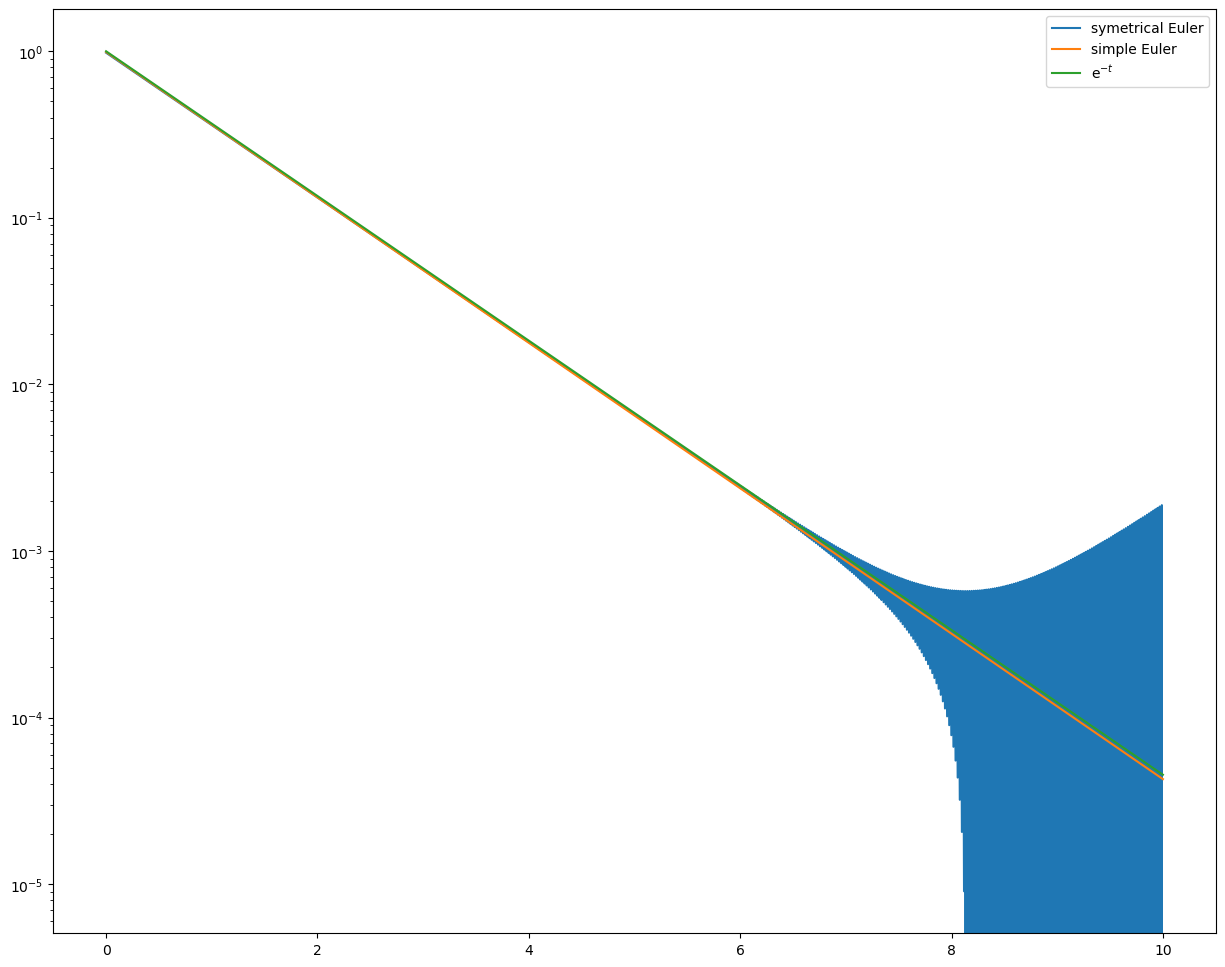

In [25]:
t = np.linspace(0, 10, 1000)
deltaT = t[1] - t[0]

# Matplotlib doesnt support generator inputs
simple_gen = simple_Euler(y0=1, deltaT=deltaT)
simple = [y for y, _ in zip(simple_gen, t)]

sym_gen = sym_Euler(y0=1, y1=np.exp(-deltaT), deltaT=deltaT)
sym = [y for y, t in zip(sym_gen, t)]


plt.plot(t, sym, label="symetrical Euler")
plt.plot(t, simple, label="simple Euler")
plt.plot(t, np.exp(-t), label="$\mathrm{e}^{-t}$")
plt.yscale("log")
plt.legend()

### b)

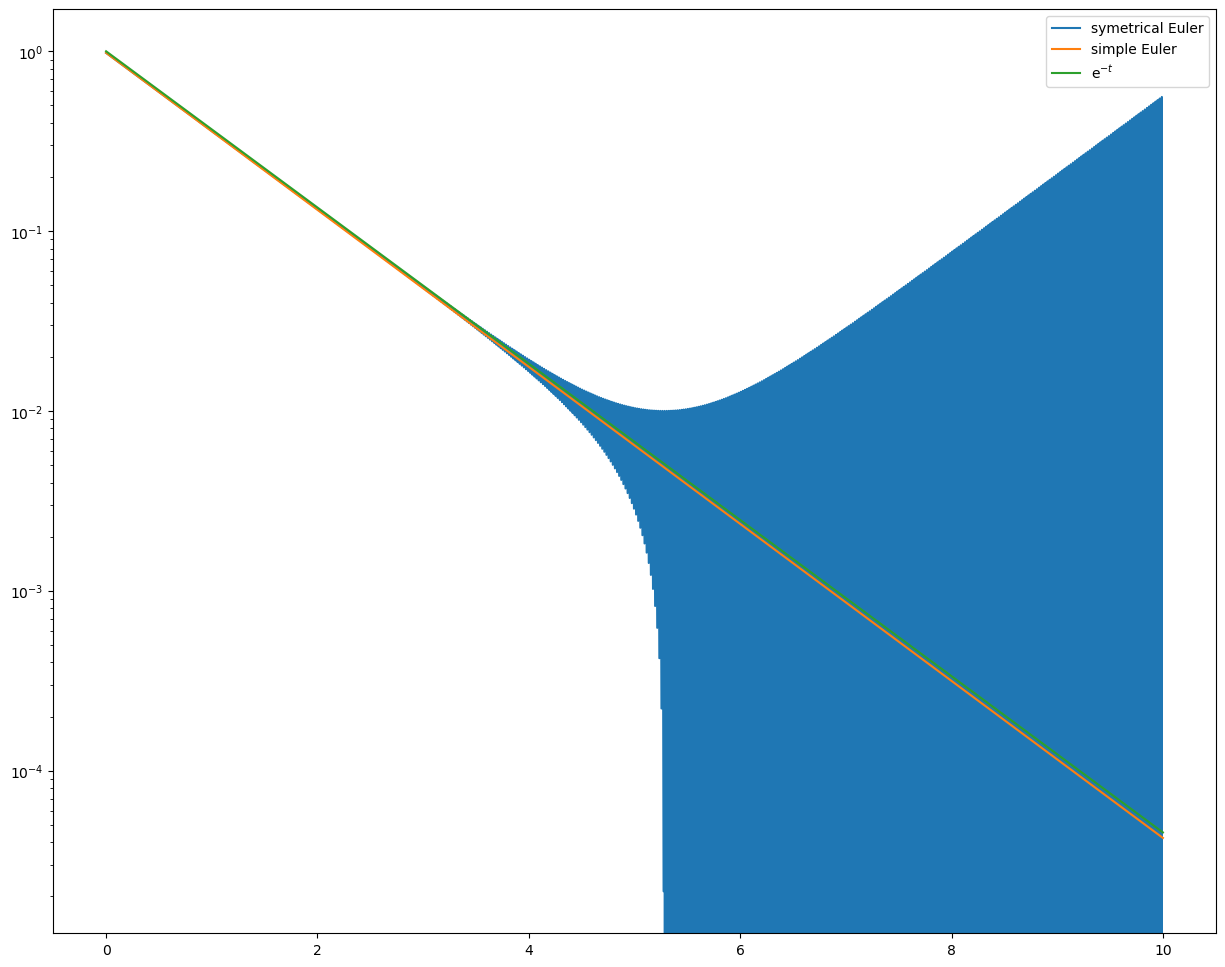

In [26]:
# Matplotlib doesnt support generator inputs
simple_gen = simple_Euler(y0=1 - deltaT, deltaT=deltaT)
simple = [y for y, _ in zip(simple_gen, t)]

sym_gen = sym_Euler(y0=1, y1=1 - deltaT, deltaT=deltaT)
sym = [y for y, _ in zip(sym_gen, t)]


plt.plot(t, sym, label="symetrical Euler")
plt.plot(t, simple, label="simple Euler")
plt.plot(t, np.exp(-t), label="$\mathrm{e}^{-t}$")
plt.yscale("log")
plt.legend()

Es fällt auf, das mit den veränderten Startwerten die extremen Abweichungen früher beginnen.